In [3]:
import pandas as pd

In [29]:
dataset=pd.read_csv("../../Data/data-2.csv")

dataset

,docno,doclen,text
0,LA122989-0001,50,the citi compton ask peopl donat book given hi...
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...
2,LA122989-0005,32,leona helmsley correct said onli littl peopl p...
3,LA122989-0006,87,your editori dec 14 remark upon result studi i...
4,LA122989-0007,431,soviet presid mikhail s gorbachev day away sev...
...,...,...,...
57509,FT911-3689,16,hundr romanian riot polic arm baton shield sto...
57510,FT911-3690,25,in earli edit financi time april 13 pictur mr ...
57511,FT911-3691,367,few issu quit controversi govern privatis prog...
57512,FT911-3692,375,uk stock suffer anoth sharp revers yesterday f...


In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
%%time
count=0
sid = SentimentIntensityAnalyzer()
neg_results=[]
pos_results=[]
neu_results=[]
compunds=[]




for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     ss = sid.polarity_scores(dataset.iloc[i]["text"])
     neg_results.append(ss["neg"])
     pos_results.append(ss["pos"])
     neu_results.append(ss["neu"])
     compunds.append(ss["compound"])

dataset["neg"]=neg_results
dataset["pos"]=pos_results


dataset["neu"]=neu_results


dataset["compund"]=compunds


        



    
    

    

CPU times: user 1min 37s, sys: 591 ms, total: 1min 38s
Wall time: 1min 38s


In [37]:
dataset["neg"].mean()

0.06887813401954307

In [38]:
dataset["pos"].mean()

0.09215500573773343

In [39]:
dataset["neu"].mean()

0.8389634871509545

In [40]:
dataset["compund"].mean()

0.2891118962339604

In [47]:
dataset

,docno,doclen,text,neg,pos,neu,compund
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...,0.035,0.099,0.866,0.9638
1,LA062989-0001,44,express conflict ideolog even contain symbol s...,0.045,0.214,0.741,0.8271
2,LA062989-0002,51,how inan reason five suprem court justic rule ...,0.067,0.146,0.788,0.5574
3,LA062989-0003,31,former california chief justic rose bird use m...,0.163,0.054,0.784,-0.4118
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...,0.017,0.081,0.902,0.7783
...,...,...,...,...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...,0.060,0.111,0.829,0.8689
20568,FT922-1327,254,compani are encourag employe travel road rail ...,0.009,0.039,0.952,0.4310
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...,0.106,0.048,0.846,-0.4767
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...,0.130,0.044,0.827,-0.8761


array([[<AxesSubplot:title={'center':'compund'}>]], dtype=object)

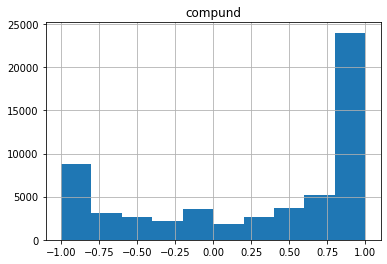

In [50]:
dataset.hist(column="compund")





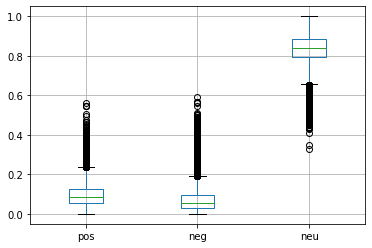

In [49]:
dataset.boxplot(column=['pos','neg','neu'], return_type='axes');


In [44]:
def f(row):
    if row['compund']>=0.95:
        val = 1
    elif row['compund']<=-0.9:
        val = -1
    else:
        val = 0
    return val

In [48]:
dataset['class'] = dataset.apply(f, axis=1)
positive_docs=dataset[dataset['compund']>0.95 ]
neg_docs=dataset[dataset['compund']<-0.7  ]
positive_docs=positive_docs[['docno','compund','class']]
positive_docs



,docno,doclen,text,neg,pos,neu,compund,class
0,LA122989-0001,50,the citi compton ask peopl donat book given hi...,0.041,0.066,0.893,0.3182,0
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...,0.052,0.093,0.855,0.9260,0
2,LA122989-0005,32,leona helmsley correct said onli littl peopl p...,0.167,0.000,0.833,-0.5574,0
3,LA122989-0006,87,your editori dec 14 remark upon result studi i...,0.072,0.000,0.928,-0.6597,0
4,LA122989-0007,431,soviet presid mikhail s gorbachev day away sev...,0.097,0.058,0.845,-0.9465,-1
...,...,...,...,...,...,...,...,...
57509,FT911-3689,16,hundr romanian riot polic arm baton shield sto...,0.194,0.000,0.806,-0.5574,0
57510,FT911-3690,25,in earli edit financi time april 13 pictur mr ...,0.000,0.000,1.000,0.0000,0
57511,FT911-3691,367,few issu quit controversi govern privatis prog...,0.116,0.141,0.743,0.8781,0
57512,FT911-3692,375,uk stock suffer anoth sharp revers yesterday f...,0.110,0.093,0.797,-0.7717,0


In [46]:
neg_docs=neg_docs[['docno','compund','class']]
neg_docs

,docno,compund,class
4,LA122989-0007,-0.9465,-1
5,LA122989-0008,-0.8225,0
7,LA122989-0010,-0.9464,-1
12,LA122989-0016,-0.7351,0
27,LA122989-0033,-0.7351,0
...,...,...,...
57470,FT911-3650,-0.7096,0
57493,FT911-3673,-0.9451,-1
57506,FT911-3686,-0.8910,0
57507,FT911-3687,-0.7351,0


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

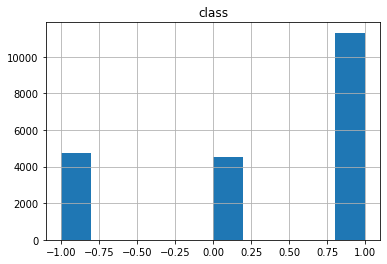

In [52]:
dataset.hist(column="class")

In [43]:
pos_docs=dataset[dataset['class']==1]
pos_docs

,docno,doclen,text,neg,pos,neu,compund,class
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...,0.052,0.093,0.855,0.9260,1
6,LA122989-0009,468,i announc meant no cat i auster father deaf en...,0.111,0.145,0.744,0.9325,1
8,LA122989-0011,535,those look insight tonight holiday bowl game b...,0.043,0.168,0.789,0.9967,1
9,LA122989-0012,670,fourteen minut thursday night texaco star tour...,0.061,0.134,0.805,0.9951,1
10,LA122989-0013,228,when socker goalscor begin play defens team us...,0.032,0.089,0.879,0.9349,1
...,...,...,...,...,...,...,...,...
57489,FT911-3669,270,bulgaria law privatis properti right place aut...,0.053,0.111,0.835,0.9610,1
57497,FT911-3677,140,fokker dutch aerospac group aim complet feasib...,0.061,0.094,0.845,0.7269,1
57499,FT911-3679,177,accord figur releas bank finland total soviet ...,0.091,0.171,0.738,0.9501,1
57511,FT911-3691,367,few issu quit controversi govern privatis prog...,0.116,0.141,0.743,0.8781,1


In [54]:
neg_docs=dataset[dataset['class']==-1]
neg_docs

,docno,doclen,text,neg,pos,neu,compund,class
5,LA062989-0005,17,how difficult inspiringli pain bleed die old g...,0.406,0.092,0.502,-0.8176,-1
9,LA062989-0009,506,the state air resourc board last week delay fa...,0.124,0.092,0.784,-0.9022,-1
10,LA062989-0010,434,the bush administr struck faustian bargain mem...,0.081,0.067,0.851,-0.8225,-1
15,LA090890-0002,141,i read interest john balzer articl mideast cri...,0.205,0.086,0.709,-0.9766,-1
16,LA090890-0003,125,your editori aug 26 describ scholast aptitud t...,0.189,0.074,0.736,-0.9349,-1
...,...,...,...,...,...,...,...,...
20551,FT922-1310,181,citizen advic bureaux press govern tighter rul...,0.142,0.077,0.782,-0.8481,-1
20555,FT922-1314,207,radic chang legal aid need control continu ris...,0.091,0.069,0.840,-0.8360,-1
20559,FT922-1318,156,the number case claim equal pay equal valu bro...,0.075,0.008,0.916,-0.7003,-1
20561,FT922-1320,270,harri pianist tickl ivori attempt lull shopper...,0.115,0.079,0.806,-0.8720,-1


In [55]:
neu_docs=dataset[dataset['class']==0]
neu_docs

,docno,doclen,text,neg,pos,neu,compund,class
3,LA062989-0003,31,former california chief justic rose bird use m...,0.163,0.054,0.784,-0.4118,0
6,LA062989-0006,43,not long ago larri flynt publish hustler magaz...,0.000,0.000,1.000,0.0000,0
8,LA062989-0008,46,the suprem court 54 decis support right burn c...,0.060,0.133,0.808,0.4215,0
23,LA090890-0010,63,i dont know bret johnson i know quarterback ki...,0.000,0.027,0.973,0.1655,0
25,LA090890-0012,49,again year usc public depart done hollywood jo...,0.066,0.054,0.880,-0.1531,0
...,...,...,...,...,...,...,...,...
20563,FT922-1322,396,the sharp declin last month britain visibl tra...,0.046,0.053,0.901,0.4215,0
20565,FT922-1324,79,the scottish deep mine industri wither privati...,0.036,0.052,0.912,0.0772,0
20566,FT922-1325,93,the battl surviv uk two naval dockyard took ne...,0.022,0.014,0.964,-0.2023,0
20568,FT922-1327,254,compani are encourag employe travel road rail ...,0.009,0.039,0.952,0.4310,0


In [47]:
from collections import Counter
pos_count=pd.DataFrame(Counter(" ".join(pos_docs["text"]).split()).most_common(100),columns=['word','count'])
pos_count
Counter(" ".join(pos_docs["text"]).split()).most_common(100)

[('the', 129904),
 ('said', 85683),
 ('year', 65310),
 ('i', 51433),
 ('would', 43339),
 ('per', 42318),
 ('one', 40434),
 ('mr', 40288),
 ('cent', 39434),
 ('compani', 36835),
 ('it', 36092),
 ('new', 35791),
 ('pound', 35322),
 ('last', 30963),
 ('market', 29865),
 ('time', 28565),
 ('but', 28442),
 ('say', 27167),
 ('also', 27088),
 ('he', 26510),
 ('two', 26204),
 ('in', 26166),
 ('first', 24918),
 ('us', 24640),
 ('like', 24204),
 ('bank', 22226),
 ('make', 22094),
 ('share', 21730),
 ('group', 21168),
 ('work', 20025),
 ('a', 19477),
 ('state', 19469),
 ('could', 19329),
 ('dollar', 18694),
 ('play', 18543),
 ('govern', 18502),
 ('peopl', 18110),
 ('busi', 17916),
 ('go', 17695),
 ('get', 17122),
 ('citi', 16745),
 ('use', 16699),
 ('price', 16082),
 ('week', 15991),
 ('take', 15967),
 ('even', 15625),
 ('may', 15562),
 ('manag', 15463),
 ('point', 15337),
 ('day', 15206),
 ('three', 15171),
 ('rate', 15160),
 ('game', 15065),
 ('industri', 15038),
 ('mani', 15020),
 ('includ', 1

In [73]:
neg_count=pd.DataFrame(Counter(" ".join(neg_docs["text"]).split()).most_common(100),columns=['word','count'])
neg_count
Counter(" ".join(neg_docs["text"]).split()).most_common(100)


[('the', 15884),
 ('said', 15486),
 ('year', 6324),
 ('would', 5300),
 ('i', 4937),
 ('one', 4794),
 ('mr', 4690),
 ('it', 3671),
 ('new', 3645),
 ('us', 3585),
 ('last', 3581),
 ('in', 3488),
 ('state', 3471),
 ('two', 3471),
 ('but', 3380),
 ('time', 3209),
 ('govern', 3157),
 ('he', 3072),
 ('peopl', 3017),
 ('also', 3005),
 ('say', 2945),
 ('per', 2919),
 ('cent', 2831),
 ('offici', 2697),
 ('a', 2627),
 ('citi', 2591),
 ('could', 2552),
 ('report', 2491),
 ('first', 2470),
 ('polic', 2429),
 ('offic', 2341),
 ('compani', 2306),
 ('day', 2213),
 ('bank', 2128),
 ('use', 2103),
 ('may', 2089),
 ('week', 2062),
 ('work', 2058),
 ('forc', 2024),
 ('month', 2017),
 ('market', 1988),
 ('nation', 1952),
 ('like', 1950),
 ('make', 1930),
 ('mani', 1903),
 ('dollar', 1890),
 ('even', 1881),
 ('counti', 1865),
 ('go', 1837),
 ('three', 1833),
 ('call', 1831),
 ('pound', 1814),
 ('group', 1776),
 ('war', 1771),
 ('presid', 1706),
 ('take', 1701),
 ('hous', 1694),
 ('san', 1689),
 ('problem',

In [57]:
dataset.to_csv('sentiment_constraints.csv',index=True)

In [56]:
dataset=dataset[['docno','doclen','text','compund','class']]
dataset

,docno,doclen,text,compund,class
0,LA122989-0001,50,the citi compton ask peopl donat book given hi...,0.3182,0
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...,0.9260,0
2,LA122989-0005,32,leona helmsley correct said onli littl peopl p...,-0.5574,0
3,LA122989-0006,87,your editori dec 14 remark upon result studi i...,-0.6597,0
4,LA122989-0007,431,soviet presid mikhail s gorbachev day away sev...,-0.9465,-1
...,...,...,...,...,...
57509,FT911-3689,16,hundr romanian riot polic arm baton shield sto...,-0.5574,0
57510,FT911-3690,25,in earli edit financi time april 13 pictur mr ...,0.0000,0
57511,FT911-3691,367,few issu quit controversi govern privatis prog...,0.8781,0
57512,FT911-3692,375,uk stock suffer anoth sharp revers yesterday f...,-0.7717,0


In [1]:
%%time
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

dataset=pd.read_csv("../../Data/data-2.csv")

count=0
sid = SentimentIntensityAnalyzer()
def f(row):
    ss = sid.polarity_scores(row["text"])
    if ss['compound']>=0.95:
        val = 1
    elif ss['compound']<=-0.7:
        val = -1
    else:
        val = 0
    return val
print('here')
dataset['class'] = dataset.apply(f, axis=1)
print('here')




here
here
CPU times: user 1min 35s, sys: 1.57 s, total: 1min 37s
Wall time: 1min 35s


In [2]:
dataset=dataset[['docno','class']]


dataset.to_csv('./sentiment2.csv',index=False)

print('Sentiment.csv created')

Sentiment.csv created


In [3]:
dataset1=pd.read_csv('./sentiment2.csv',index_col=False)

dataset1

,docno,class
0,LA122989-0001,0
1,LA122989-0002,0
2,LA122989-0005,0
3,LA122989-0006,0
4,LA122989-0007,-1
...,...,...
57509,FT911-3689,0
57510,FT911-3690,0
57511,FT911-3691,0
57512,FT911-3692,-1


In [15]:
positive_docs=dataset[dataset['class']==1]['docno']
negative_docs=dataset[dataset['class']==-1]['docno']
list(positive_docs)

[' LA122989-0011 ',
 ' LA122989-0012 ',
 ' LA122989-0018 ',
 ' LA122989-0019 ',
 ' LA122989-0021 ',
 ' LA122989-0025 ',
 ' LA122989-0032 ',
 ' LA122989-0041 ',
 ' LA122989-0045 ',
 ' LA122989-0070 ',
 ' LA122989-0072 ',
 ' LA122989-0073 ',
 ' LA122989-0074 ',
 ' LA122989-0075 ',
 ' LA122989-0076 ',
 ' LA122989-0082 ',
 ' LA122989-0083 ',
 ' LA122989-0090 ',
 ' LA122989-0092 ',
 ' LA122989-0101 ',
 ' LA122989-0106 ',
 ' LA122989-0108 ',
 ' LA122989-0112 ',
 ' LA122989-0122 ',
 ' LA122989-0123 ',
 ' LA122989-0124 ',
 ' LA122989-0129 ',
 ' LA122989-0132 ',
 ' LA122989-0133 ',
 ' LA122989-0135 ',
 ' LA122989-0140 ',
 ' LA122989-0141 ',
 ' LA122989-0142 ',
 ' LA122989-0143 ',
 ' LA122989-0150 ',
 ' LA122989-0163 ',
 ' LA122989-0166 ',
 ' LA111390-0005 ',
 ' LA111390-0012 ',
 ' LA111390-0017 ',
 ' LA111390-0018 ',
 ' LA111390-0019 ',
 ' LA111390-0020 ',
 ' LA111390-0021 ',
 ' LA111390-0029 ',
 ' LA111390-0030 ',
 ' LA111390-0034 ',
 ' LA111390-0035 ',
 ' LA111390-0036 ',
 ' LA111390-0037 ',


In [16]:
list(negative_docs)

[' LA122989-0007 ',
 ' LA122989-0008 ',
 ' LA122989-0010 ',
 ' LA122989-0016 ',
 ' LA122989-0033 ',
 ' LA122989-0034 ',
 ' LA122989-0035 ',
 ' LA122989-0036 ',
 ' LA122989-0038 ',
 ' LA122989-0039 ',
 ' LA122989-0043 ',
 ' LA122989-0044 ',
 ' LA122989-0046 ',
 ' LA122989-0049 ',
 ' LA122989-0052 ',
 ' LA122989-0055 ',
 ' LA122989-0062 ',
 ' LA122989-0063 ',
 ' LA122989-0065 ',
 ' LA122989-0066 ',
 ' LA122989-0068 ',
 ' LA122989-0079 ',
 ' LA122989-0080 ',
 ' LA122989-0094 ',
 ' LA122989-0103 ',
 ' LA122989-0109 ',
 ' LA122989-0110 ',
 ' LA122989-0111 ',
 ' LA122989-0116 ',
 ' LA122989-0117 ',
 ' LA122989-0131 ',
 ' LA122989-0144 ',
 ' LA122989-0151 ',
 ' LA122989-0152 ',
 ' LA122989-0154 ',
 ' LA122989-0155 ',
 ' LA122989-0157 ',
 ' LA122989-0161 ',
 ' LA122989-0169 ',
 ' LA111390-0003 ',
 ' LA111390-0013 ',
 ' LA111390-0014 ',
 ' LA111390-0044 ',
 ' LA111390-0045 ',
 ' LA111390-0046 ',
 ' LA111390-0047 ',
 ' LA111390-0051 ',
 ' LA111390-0052 ',
 ' LA111390-0059 ',
 ' LA111390-0060 ',
